## Sentiment Analysis with Bag‑of‑Words

We build a small sentiment dataset of positive and negative sentences.  After tokenising the text using a **Bag‑of‑Words** representation, we train a logistic regression classifier to predict sentiment.  We'll examine evaluation metrics and identify which words carry the most weight.


Dataset sample:


,text,label
0,"I absolutely loved this product, it worked won...",1
1,"What a fantastic experience, highly recommend!",1
2,I'm extremely satisfied with the service provi...,1
3,The movie was wonderful and truly enjoyable.,1
4,"Great value for money, I will definitely buy a...",1


Accuracy: 0.167

Classification Report:
              precision    recall  f1-score   support

    negative       0.25      0.33      0.29         3
    positive       0.00      0.00      0.00         3

    accuracy                           0.17         6
   macro avg       0.12      0.17      0.14         6
weighted avg       0.12      0.17      0.14         6



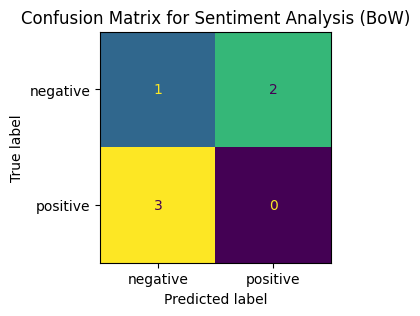

Top words contributing to positive sentiment:
delicious: 0.32
excellent: 0.32
meal: 0.32
superb: 0.29
beautiful: 0.29
design: 0.29
absolutely: 0.27
worked: 0.27
wonders: 0.27
loved: 0.27

Top words contributing to negative sentiment:
ve: -0.29
work: -0.29
purchase: -0.29
worst: -0.29
disappointed: -0.29
didn: -0.29
awful: -0.29
refund: -0.29
want: -0.29
help: -0.27


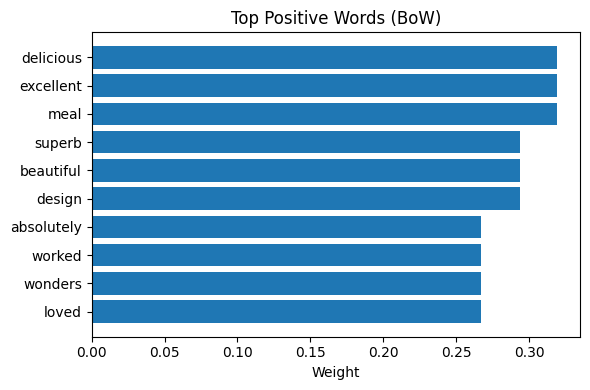

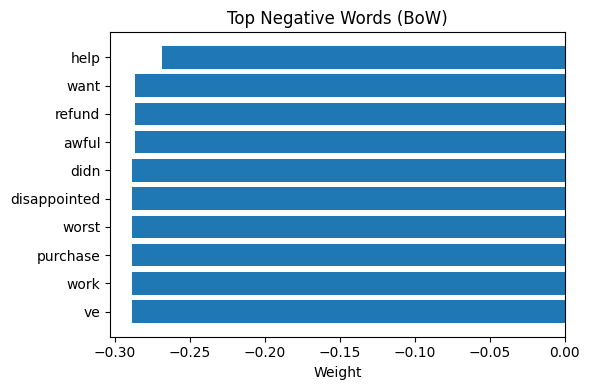

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

# Create a tiny custom dataset
positive_sentences = [
    "I absolutely loved this product, it worked wonders!",
    "What a fantastic experience, highly recommend!",
    "I'm extremely satisfied with the service provided.",
    "The movie was wonderful and truly enjoyable.",
    "Great value for money, I will definitely buy again.",
    "The support team was friendly and resolved my issue.",
    "An outstanding performance that exceeded my expectations.",
    "Delicious meal and excellent customer service.",
    "Beautiful design and superb quality.",
    "The trip was amazing, we had a great time!"
]

negative_sentences = [
    "This was the worst purchase I've ever made.",
    "I am very disappointed, it didn't work at all.",
    "The service was terrible and the staff were rude.",
    "What a waste of money, completely useless.",
    "I hated the movie, it was boring and too long.",
    "Not worth the price, extremely poor quality.",
    "I had an awful experience, never coming back.",
    "The food was bad and the wait time was ridiculous.",
    "Broken on arrival and customer service was no help.",
    "This product is awful, I want a refund."
]

texts = positive_sentences + negative_sentences
labels = [1] * len(positive_sentences) + [0] * len(negative_sentences)

df = pd.DataFrame({'text': texts, 'label': labels})
print('Dataset sample:')
display(df.head())

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42, stratify=df['label'])

# Convert text to bag-of-words features
vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train logistic regression classifier
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_bow, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test_bow)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
# Print a blank line before the classification report
print()
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['negative','positive']))

# Confusion matrix
fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative','positive'], ax=ax, colorbar=False)
plt.title('Confusion Matrix for Sentiment Analysis (BoW)')
plt.show()

# Inspect top words
coefficients = clf.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Get top positive and negative words
top_pos_indices = np.argsort(coefficients)[-10:]
top_neg_indices = np.argsort(coefficients)[:10]

top_pos_words = [(feature_names[i], coefficients[i]) for i in top_pos_indices]
top_neg_words = [(feature_names[i], coefficients[i]) for i in top_neg_indices]

print('Top words contributing to positive sentiment:')
for word, weight in reversed(top_pos_words):
    print(f"{word}: {weight:.2f}")

print()  # Blank line before the negative words
print('Top words contributing to negative sentiment:')
for word, weight in top_neg_words:
    print(f"{word}: {weight:.2f}")

# Plot top words
def plot_word_weights(word_weights, title):
    words, weights = zip(*word_weights)
    plt.figure(figsize=(6, 4))
    bar_positions = np.arange(len(words))
    plt.barh(bar_positions, weights, align='center')
    plt.yticks(bar_positions, words)
    plt.xlabel('Weight')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_word_weights(top_pos_words, 'Top Positive Words (BoW)')
plot_word_weights(top_neg_words, 'Top Negative Words (BoW)')


### Interpretation

Even with a small dataset, the bag‑of‑words model captures key sentiment cues.  Words like *loved*, *fantastic* and *friendly* have high positive weights, while *worst*, *awful* and *disappointed* contribute strongly to negative predictions.  In business, such models allow companies to automatically classify customer feedback, prioritise support tickets and gauge overall satisfaction levels.
